In [77]:
#Importing libraries
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import h5py
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
import keras

In [78]:
#the csv can be found here
#  https://www.kaggle.com/deadskull7/fer2013
##

#reading the data
with open("fer2013.csv") as f:
    content = f.readlines()

lines = np.array(content)
num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

number of instances:  35888
instance length:  2304


In [79]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

In [80]:
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")  
        val = img.split(" ")     
        pixels = np.array(val, 'float32')
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
        print("",end="")

In [81]:
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train)
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test)

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

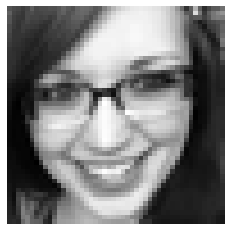

In [82]:
some_digit = x_test[4]
some_digit_image = some_digit.reshape(48,48)
plt.imshow(some_digit_image, 
          interpolation="nearest", cmap='gray')
plt.axis("off")
plt.show()

In [83]:
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

In [85]:
def emotion_analysis(emotions):
    # emotion dic with integer keys 
    my_dict = dict({0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'})

    return my_dict.get(int(emotions))

In [86]:
emotion_analysis(y_test[4])

'Happy'

In [87]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import sklearn

In [88]:
#create model and fit 

rfc = RandomForestClassifier(n_jobs=-1, n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [89]:
#accuracy of the model
rfc.score(x_test, y_test)

0.46586792978545555

In [90]:
#predicting validation set from the csv
y_pred = rfc.predict(x_test)
y_pred

array(['0', '3', '4', ..., '6', '2', '6'], dtype='<U1')

In [91]:
rfc.predict_proba(x_test)[0:10, 3]

array([0.17, 0.29, 0.15, 0.26, 0.46, 0.37, 0.14, 0.22, 0.19, 0.2 ])

In [92]:
from keras.preprocessing import image
from IPython.display import display 
from PIL import Image

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Angry


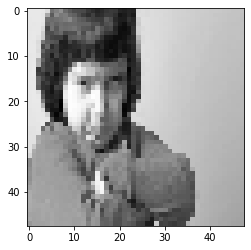

In [95]:
#loading an image of suzy to test
img = image.load_img("9.jpg", grayscale=True, target_size=(48, 48))

x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
 
#predicting uploaded image    
custom = rfc.predict(x.reshape(1, -1))

print(emotion_analysis(custom[0]))
 
x = np.array(x, 'float32')
x = x.reshape([48, 48]);
 
plt.gray()
plt.imshow(x)
plt.show()

In [96]:
# Evaluate model with confusion matrix, classification report and accuracy score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 92   0  41 171  69  17  77]
 [  3  15   3  23   5   1   6]
 [ 20   0 136 146  79  39  76]
 [ 14   0  22 704  65  25  65]
 [ 30   0  35 232 238   9 109]
 [ 16   0  28  68  21 249  33]
 [ 31   0  29 208  85  16 238]]
              precision    recall  f1-score   support

           0       0.45      0.20      0.27       467
           1       1.00      0.27      0.42        56
           2       0.46      0.27      0.34       496
           3       0.45      0.79      0.58       895
           4       0.42      0.36      0.39       653
           5       0.70      0.60      0.65       415
           6       0.39      0.39      0.39       607

    accuracy                           0.47      3589
   macro avg       0.55      0.41      0.44      3589
weighted avg       0.48      0.47      0.45      3589

0.46586792978545555


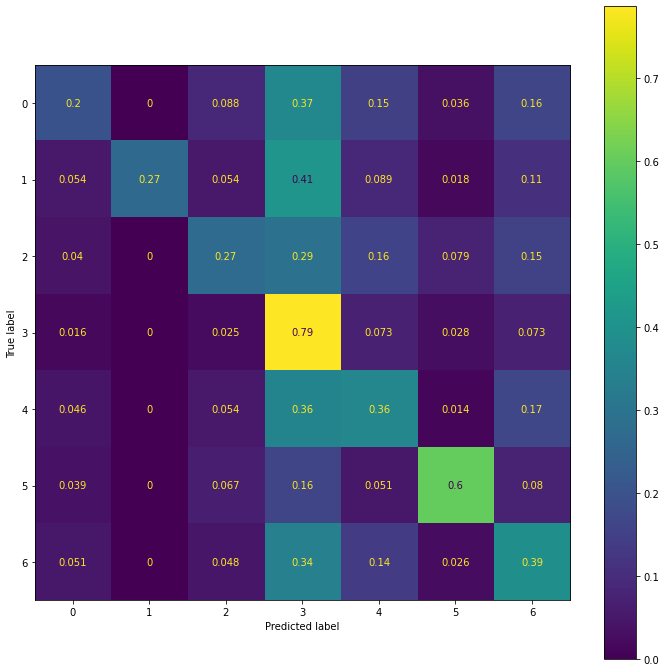

In [97]:
f,ax=plt.subplots(1,1,figsize=(12,12))
# print("Classification report for classifier %s:\n%s\n"
#       % (rfc, metrics.classification_report(y_test, y_pred)))
disp = metrics.plot_confusion_matrix(rfc, x_test, y_test,normalize='true',ax=ax)

In [98]:
y_probas_0 = rfc.predict_proba(x_test)[:,0]
y_probas_1 = rfc.predict_proba(x_test)[:,1]
y_probas_2 = rfc.predict_proba(x_test)[:,2]
y_probas_3 = rfc.predict_proba(x_test)[:,3]
y_probas_4 = rfc.predict_proba(x_test)[:,4]
y_probas_5 = rfc.predict_proba(x_test)[:,5]
y_probas_6 = rfc.predict_proba(x_test)[:,6]
#y_probas_forest

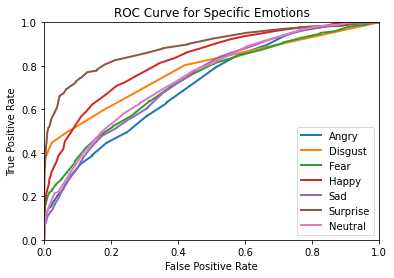

In [99]:
# Plot an ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probas_0, pos_label='0')
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_probas_1, pos_label='1')
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_test, y_probas_2, pos_label='2')
fpr4, tpr4, thresholds3 = metrics.roc_curve(y_test, y_probas_3, pos_label='3')
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_test, y_probas_4, pos_label='4')
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_test, y_probas_5, pos_label='5')
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_test, y_probas_6, pos_label='6')
plt.title('ROC Curve for Specific Emotions')
plt.plot(fpr, tpr, linewidth=2)
plt.plot(fpr2, tpr2, linewidth=2)
plt.plot(fpr3, tpr3, linewidth=2)
plt.plot(fpr4, tpr4, linewidth=2)
plt.plot(fpr5, tpr5, linewidth=2)
plt.plot(fpr6, tpr6, linewidth=2)
plt.plot(fpr7, tpr7, linewidth=2)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], loc='lower right')
plt.show()